**Regression** problems have *continuous* and usually *unbounded* outputs. An example is when you’re estimating the salary as a function of experience and education level.

On the other hand, **classification** problems have *discrete* and *finite* outputs called **classes** or **categories**. For example, predicting if an employee is going to be promoted or not (*true* or *false*) is a classification problem.

The **sigmoid function** has values very close to either **0** or **1** across most of its domain. This fact makes it suitable for application in *classification methods*.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [3]:
model = LogisticRegression(solver="liblinear", random_state=0)
model.fit(x, y)  # train the model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [4]:
model.classes_  # the array of distinct values that y takes

array([0, 1])

In [5]:
model.intercept_

array([-1.04608067])

In [6]:
model.coef_

array([[0.51491375]])

In [7]:
model.predict_proba(x)  # probabilities that the output is equal to 0 or 1

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [8]:
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [9]:
model.score(x, y)  # ratio of correct predictions to the total observations

0.9

In [10]:
confusion_matrix(y, model.predict(x))

array([[3, 1],
       [0, 6]], dtype=int64)

+ **True negatives** in the upper-left position
+ **False negatives** in the lower-left position
+ **False positives** in the upper-right position
+ **True positives** in the lower-right position

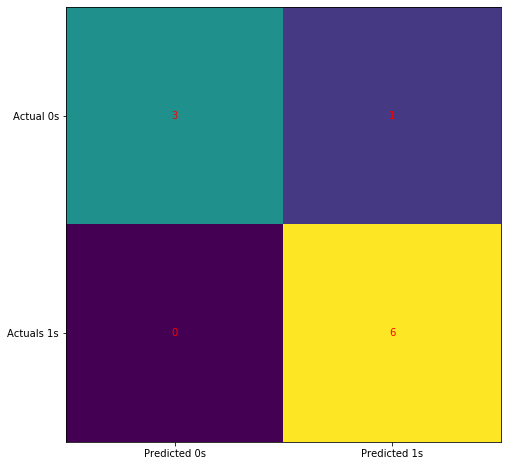

In [11]:
cm = confusion_matrix(y, model.predict(x))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=("Predicted 0s", "Predicted 1s"))
ax.yaxis.set(ticks=(0, 1), ticklabels=("Actual 0s", "Actuals 1s"))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="red")
plt.show()  # heatmap of the confusion matrix

In [12]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



## Improve the Model

In [13]:
model = LogisticRegression(solver="liblinear", C=10.0, random_state=0)
model.fit(x,y)

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
model.intercept_

array([-3.51335372])

In [15]:
model.coef_

array([[1.12066084]])

In [16]:
model.predict_proba(x)

array([[0.97106534, 0.02893466],
       [0.9162684 , 0.0837316 ],
       [0.7810904 , 0.2189096 ],
       [0.53777071, 0.46222929],
       [0.27502212, 0.72497788],
       [0.11007743, 0.88992257],
       [0.03876835, 0.96123165],
       [0.01298011, 0.98701989],
       [0.0042697 , 0.9957303 ],
       [0.00139621, 0.99860379]])

In [17]:
model.predict(x)

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [18]:
model.score(x, y)

1.0

In [19]:
confusion_matrix(y, model.predict(x))

array([[4, 0],
       [0, 6]], dtype=int64)

In [20]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [21]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1])
model = LogisticRegression(solver="liblinear", C=10.0, random_state=0)
model.fit(x, y)
p_pred = model.predict_proba(x)
y_pred = model.predict(x)
score = model.score(x, y)
conf_m = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred)

In [22]:
print("x:", x, sep="\n")

x:
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]


In [23]:
print("y", y, sep="\n", end="\n\n")

y
[0 1 0 0 1 1 1 1 1 1]



In [24]:
print("intercept:", model.intercept_)

intercept: [-1.51632619]


In [25]:
print("coef:", model.coef_, end="\n\n")

coef: [[0.703457]]



In [26]:
print("p_pred:", p_pred, sep="\n", end="\n\n")

p_pred:
[[0.81999686 0.18000314]
 [0.69272057 0.30727943]
 [0.52732579 0.47267421]
 [0.35570732 0.64429268]
 [0.21458576 0.78541424]
 [0.11910229 0.88089771]
 [0.06271329 0.93728671]
 [0.03205032 0.96794968]
 [0.0161218  0.9838782 ]
 [0.00804372 0.99195628]]



In [27]:
print("y_pred", y_pred, end="\n\n")

y_pred [0 0 0 1 1 1 1 1 1 1]



In [28]:
print("score_:", score, end="\n\n")

score_: 0.8



In [29]:
print("conf_m:", conf_m, sep="\n", end="\n\n")

conf_m:
[[2 1]
 [1 6]]



In [30]:
print("report:", report, sep="\n")

report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.86      0.86      0.86         7

    accuracy                           0.80        10
   macro avg       0.76      0.76      0.76        10
weighted avg       0.80      0.80      0.80        10



## Logistic Regression with StatsModels

In [31]:
import statsmodels.api as sm

In [32]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1])
x = sm.add_constant(x)
x

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.],
       [1., 6.],
       [1., 7.],
       [1., 8.],
       [1., 9.]])

In [33]:
model = sm.Logit(y, x)
result = model.fit(method="newton")

Optimization terminated successfully.
         Current function value: 0.350471
         Iterations 7


In [34]:
result.params

array([-1.972805  ,  0.82240094])

In [35]:
result.predict(x)

array([0.12208792, 0.24041529, 0.41872657, 0.62114189, 0.78864861,
       0.89465521, 0.95080891, 0.97777369, 0.99011108, 0.99563083])

In [36]:
(result.predict(x) >= 0.5).astype(int)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [37]:
result.pred_table()

array([[2., 1.],
       [1., 6.]])

In [38]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                          Logit   Df Residuals:                        8
Method:                           MLE   Df Model:                            1
Date:                Sun, 19 Jan 2020   Pseudo R-squ.:                  0.4263
Time:                        22:21:36   Log-Likelihood:                -3.5047
converged:                       True   LL-Null:                       -6.1086
Covariance Type:            nonrobust   LLR p-value:                   0.02248
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9728      1.737     -1.136      0.256      -5.377       1.431
x1             0.8224      0.528      1.557      0.119      -0.213       1.858
==============================================================================
"""

In [39]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            Pseudo R-squared: 0.426   
Dependent Variable: y                AIC:              11.0094 
Date:               2020-01-19 22:21 BIC:              11.6146 
No. Observations:   10               Log-Likelihood:   -3.5047 
Df Model:           1                LL-Null:          -6.1086 
Df Residuals:       8                LLR p-value:      0.022485
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     7.0000                                     
-----------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
-----------------------------------------------------------------
const    -1.9728     1.7366   -1.1360   0.2560   -5.3765   1.4309
x1        0.8224     0.5281    1.5572   0.1194   -0.2127   1.8575
===============================================================

"""

## Handwriting Recognition

In [40]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [41]:
x, y = load_digits(return_X_y=True)

In [42]:
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [43]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [44]:
x_train, x_test, y_train, y_test = \
    train_test_split(x, y, test_size=0.2, random_state=0)

+ **x_train:** the part of x used to fit the model
+ **x_test:** the part of x used to evaluate the model
+ **y_train:** the part of y that corresponds to x_train
+ **y_test:** the part of y that corresponds to x_test

In [45]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [46]:
model = LogisticRegression(solver="liblinear", C=0.05, multi_class="ovr", random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [47]:
x_test = scaler.transform(x_test)

In [48]:
y_pred = model.predict(x_test)

In [49]:
model.score(x_train, y_train)

0.964509394572025

In [50]:
model.score(x_test, y_test)

0.9416666666666667

In [51]:
confusion_matrix(y_test, y_pred)

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  1,  0,  1,  1],
       [ 1,  1, 33,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 28,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  2,  1,  2,  0,  0,  0,  1, 33,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  2,  1, 36]], dtype=int64)

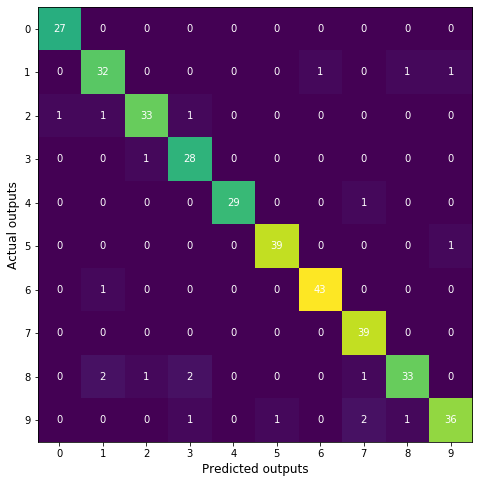

In [52]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel("Predicted outputs", fontsize=12, color="black")
ax.set_ylabel("Actual outputs", fontsize=12, color="black")
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="white")
plt.show()

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.89      0.91      0.90        35
           2       0.94      0.92      0.93        36
           3       0.88      0.97      0.92        29
           4       1.00      0.97      0.98        30
           5       0.97      0.97      0.97        40
           6       0.98      0.98      0.98        44
           7       0.91      1.00      0.95        39
           8       0.94      0.85      0.89        39
           9       0.95      0.88      0.91        41

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360



## Conclusion

+ **Import** packages, functions, and classes
+ **Get** data to work with and, if appropriate, transform it
+ **Create** a classification model and train (or fit) it with existing data
+ **Evaluate** your model to see if its performance is satisfactory
+ **Apply** your model to make predictions